In [1]:
from scipy.spatial.distance import cdist
def rbf_kernel(x1, x2, varSigma, lengthscale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)
    K = varSigma*np.exp(-np.power(d, 2)/lengthscale)
    return K

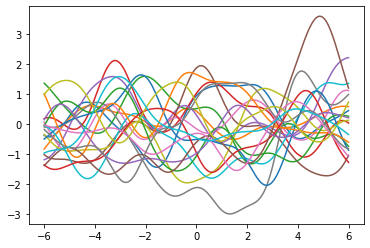

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# choose index set for the marginal
x = np.linspace(-6, 6, 200).reshape(-1, 1)
# compute covariance matrix
K = rbf_kernel(x, None, 1.0, 2.0)
# create mean vector
mu = np.zeros(x.shape[0])
# draw samples 20 from Gaussian distribution
f = np.random.multivariate_normal(mu, K, 20)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f.T);

In [3]:
def lin_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma*x1.dot(x1.T)
    else:
        return varSigma*x1.dot(x2.T)
def white_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma*np.eye(x1.shape[0])
    else:
        return np.zeros(x1.shape[0], x2.shape[0])
def periodic_kernel(x1, x2, varSigma, period, lengthScale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)
    return varSigma*np.exp(-(2*np.sin((np.pi/period)*d)**2)/lengthScale**2)

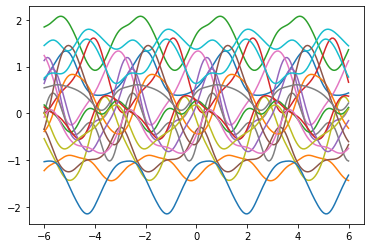

In [4]:
K = periodic_kernel(x, None, 1.0,np.pi,2.0)
f = np.random.multivariate_normal(mu, K, 20)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f.T);

In [5]:
N = 5
x = np.linspace(-3.1,3,N)
y = np.sin(2*np.pi/x) + x*0.1+ 0.3*np.random.randn(x.shape[0])
x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))
x_star = np.linspace(-6, 6, 500)
x_star=np.reshape(x_star,(-1,1))

In [6]:
def gp_prediction(x1, y1, xstar, lengthScale, varSigma):
    k_starX = rbf_kernel(xstar,x1,lengthScale,varSigma)
    k_xx = rbf_kernel(x1, None, lengthScale, varSigma)
    k_starstar = rbf_kernel(xstar,None,lengthScale,varSigma)
    mu = k_starX.dot(np.linalg.inv(k_xx)).dot(y1)
    var = k_starstar - (k_starX).dot(np.linalg.inv(k_xx)).dot(k_starX.T)
    return mu, var, x_star 

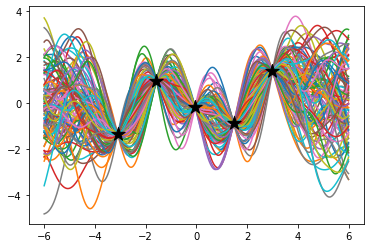

In [7]:
Nsamp = 100
mu_star, var_star, x_star = gp_prediction(x, y, x_star, 2.0, 1.0)
mu_star=mu_star.ravel()
f_star = np.random.multivariate_normal(mu_star, var_star, Nsamp)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_star, f_star.T)
ax.scatter(x, y, 200, 'k', '*', zorder=2);

In [8]:
fmean=mu_star
X=np.arange(mu_star.shape[0])
std=np.sqrt(var_star[X,X])
fmax=fmean+std
fmin=fmean-std

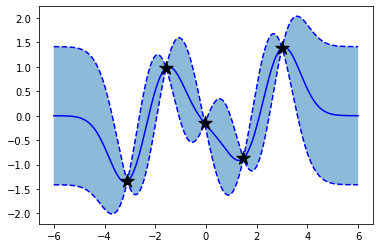

In [9]:
plt.fill_between(x_star.ravel(),fmax.ravel(),fmin.ravel(),alpha=0.5);
plt.plot(x_star,fmin,c='b',linestyle='--');
plt.plot(x_star,fmax,c='b',linestyle='--');
plt.plot(x_star,fmean,c='b',linestyle='-');
plt.scatter(x, y, 200, 'k', '*', zorder=2);